# Homework 1 - Part A

Your name: Pierre Pili

Email (one used on the moodle): pierre.pili@etu.minesparis.psl.eu 

## Exact ROC curve for mixture of Gaussians

The goal of this exercise is to extend the anaylsis made in class about [Exact ROC curve for Gaussian mixtures](https://github.com/mlelarge/icfp-ml/blob/main/solutions/Exact_ROC_GM_sol.ipynb) for a different set of parameters. We consider a mixture of (1-D) Gaussians with respective means $2$ and $5$ and respective standard deviation $1$ and $4$.
The code below should not be modified and give the corresponding latent distributions.

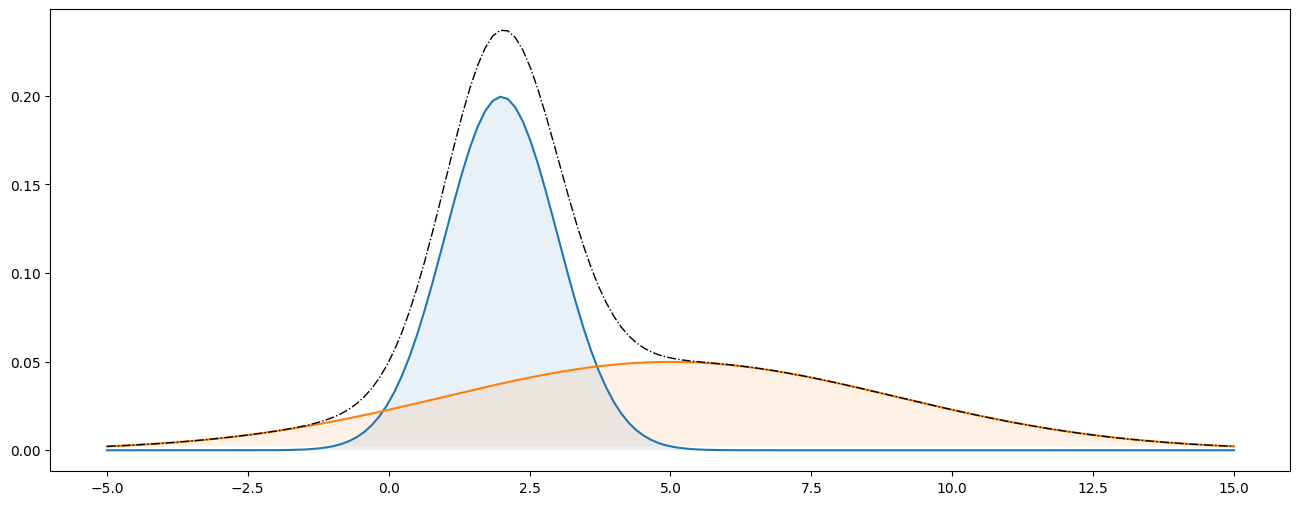

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

p = 0.5
ps = [p, 1-p]
mus = [2, 5]
sigmas = [1,4]
generative_m = np.array([stats.norm(mus[0], sigmas[0]), stats.norm(mus[1], sigmas[1])])

# plot the latent distributions
x = np.linspace(-5, 15, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, ps[0]*generative_m[0].pdf(x))
plt.plot(x, ps[1]*generative_m[1].pdf(x))
plt.plot(x, ps[0]*generative_m[0].pdf(x) + ps[1]*generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(ps[0]*generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(ps[1]*generative_m[1].pdf(x), x, alpha=0.1);

### Question: draw the corresponding ROC curve.

First code a function computing the log likelihood ratio and check (visually) that $\mathbb{1}(\mathcal{L}(x)\geq \eta) = \mathbb{1}(x\leq x_{inf}(\eta) \text{ or } x\geq x_{sup}(\eta))$. Then compute approximately $x_{inf}(\eta)$ and $x_{sup}(\eta)$ and the TPRs and FPRs as a function of $\eta$:
- **True Positive Rate** $=\mathbb{P}(\hat{Y}(X)=1|Y=1)$
- **False Positive Rate** $=\mathbb{P}(\hat{Y}(X)=1|Y=0)$

Plot also the curve for the accuracy as a function of $\eta$ and compute (approximately) the value of $\eta$ corresponding to the max accuracy. Add this point on your final ROC curve.

Using that $\mathbb{P}(Y(x)=i | x) = \frac{1}{1 + \exp(-f_i(x))}$ where $f_i$ is the normal density function corresponding to label $i$ and the log likelihood ratio $\mathcal{L}(x) = \ln \left( \frac{\mathbb{P}(Y = 1 | x)}{\mathbb{P}(Y = 0 | x)} \right)$

In [2]:
# Define function to compute log likelihood ratio
def log_likelihood_ratio(x, ps, generative_m):
    llr = np.log((1 / (1 + np.exp( - ps[1] * generative_m[1].pdf(x)))) / 
                 (1 / (1 + np.exp( - ps[0] * generative_m[0].pdf(x)))))
    return llr

# Compute log likelihood ratios for the given range of x
llr_values = log_likelihood_ratio(x, ps, generative_m)

In [3]:
# Visual check for the relationship between llr and the indicator function
def indicator_function(eta):
    return (llr_values >= eta).astype(int)

# Compute x_inf and x_sup for the given threshold eta
def bounds(eta): 
    x_inf = x[np.where(indicator_function(eta) == 0)[0][0]]
    x_sup = x[np.where(indicator_function(eta) == 0)[0][-1]]
    return x_inf, x_sup

In [4]:
eta = -0.02
x_inf, x_sup = bounds(eta)

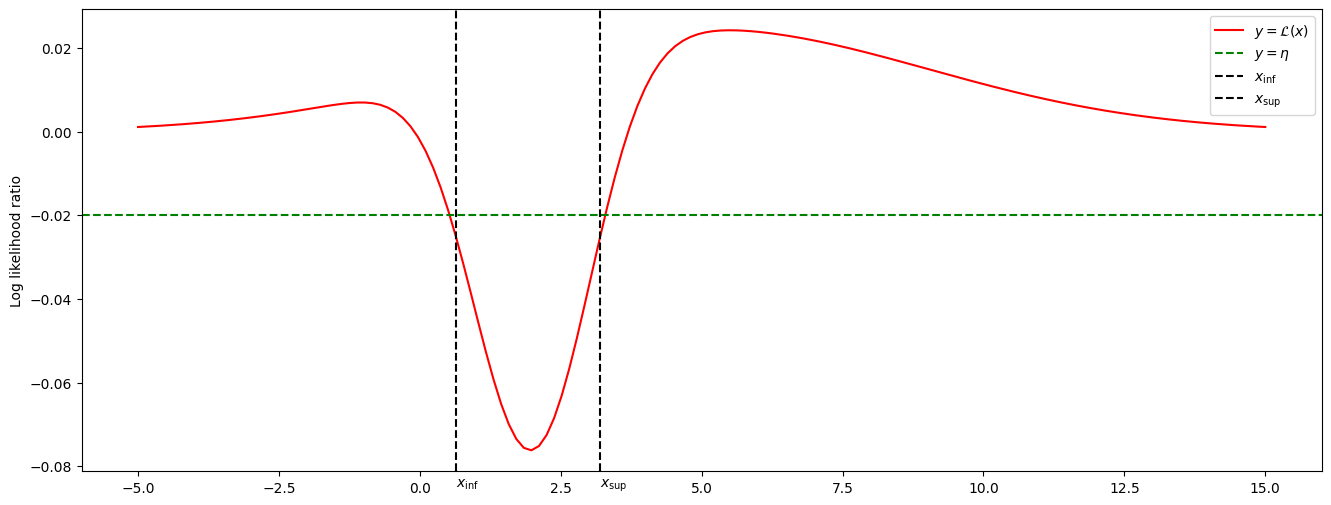

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(x, llr_values, color='red', label=r'$y = \mathcal{L}(x)$')
plt.axhline(y = eta, color='green', linestyle = '--', label = r'$y = \eta$')
plt.axvline(x = x_inf, color='black', linestyle = '--', label = r'$x_{\text{inf}}$')
plt.axvline(x = x_sup, color='black', linestyle = '--', label = r'$x_{\text{sup}}$')
plt.text(x_inf, -0.085, r'$x_{\text{inf}}$')
plt.text(x_sup, -0.085, r'$x_{\text{sup}}$')
plt.ylabel('Log likelihood ratio')
plt.legend()
plt.show()

To compute the TPRs and FPRs we derive

\begin{align*}
    \mathbb{P}(\hat{Y}(X)=1|Y=1) &= \mathbb{P}(X < x_{\text{inf}}(\eta) \cup X > x_{\text{sup}}(\eta) | Y = 1)\\
    &= \mathbb{P}(X < x_{\text{inf}}(\eta) | Y = 1) + \mathbb{P}(X > x_{\text{sup}}(\eta) | Y = 1)
\end{align*}
and
\begin{align*}
    \mathbb{P}(\hat{Y}(X)=1|Y=1) &= \mathbb{P}(X < x_{\text{inf}}(\eta) \cup X > x_{\text{sup}}(\eta) | Y = 0)\\
    &= \mathbb{P}(X < x_{\text{inf}}(\eta) | Y = 1) + \mathbb{P}(X > x_{\text{sup}}(\eta) | Y = 0)
\end{align*}

which we can compute directly by using normal cumulative density functions

In [6]:
def TPR(eta):
    x_inf, x_sup = bounds(eta)
    cdf = generative_m[1].cdf
    return cdf(x_inf) + 1 - cdf(x_sup)

def FPR(eta):
    x_inf, x_sup = bounds(eta)
    cdf = generative_m[0].cdf
    return cdf(x_inf) + 1 - cdf(x_sup)

Plotting the ROC curve

In [7]:
etas = np.linspace(0, -0.07,20)
TPRs = [TPR(eta) for eta in etas]
FPRs = [FPR(eta) for eta in etas]

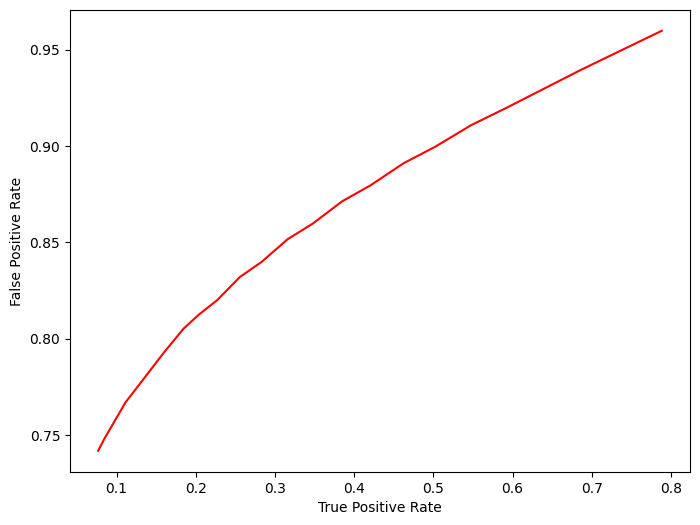

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(FPRs, TPRs, color='red')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()